# Diversity test

In [1]:
%pylab --n
%matplotlib inline

import seaborn as sns
import pandas as pd
sns.set_palette('colorblind')
import birdsonganalysis as bsa
from os.path import join, exists, basename
from scipy.io import wavfile
import pickle
import json
from pprint import pprint
import warnings
from IPython.display import Audio, display, Markdown

import sys

sys.path.append('../model/')

from song_fitter import SongModel, get_scores
from measures import genetic_neighbours
import synth
from synth import synthesize
from measures import bsa_measure

def comp(a, b):
    return np.linalg.norm(a - b)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
path = '../model/res/diversity_170518_165814/seed4+big_ba+on_alpha_silence_beta+prior_amp_entropy+super_slow_dev+500_replay+50_conc+3_day_conc+5000_diversity_th/'
if exists(join(path, 'aborted.txt')):
    warnings.warn('Aborted run')
if not exists(join(path, 'data.pkl')):
    warnings.warn('Run is not finished')

In [3]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
try:
    with open(join(path, 'conf.json'), 'r') as f:
        run_param = json.load(f)
except FileNotFoundError:
    with open(join(path, 'params.json'), 'r') as f:
        run_param = json.load(f)

In [4]:
out = '| key | value |\n|---|---|\n' + '\n'.join(['| {} | {} |'.format(key, run_param[key]) for key in sorted(run_param.keys())])
display(Markdown(out))

| key | value |
|---|---|
| coefs | {'pitch': 1, 'entropy': 5, 'amplitude': 5, 'goodness': 1, 'fm': 1, 'am': 1} |
| comp | linalg |
| concurrent | 3 |
| days | 50 |
| dev | [0.001, 0.001, 0.005, 1, 0.0005, 0.0005, 0.0005, 1, 5e-05, 5e-05, 0.005, 10, 0.005, 0.002, 0.002, 0.005, 1, 0.0005] |
| diversity_threshold | 5000 |
| dlm | optimise_gesture_padded |
| iter_per_train | 20 |
| maxs | [50, 4, 3.141592653589793, 40000, 50, 4, 3.141592653589793, 40000, 50, 5, 3.141592653589793, 40000, 10, 50, 3, 3.141592653589793, 1000, 2] |
| mins | [-50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -50, 0, -3.141592653589793, 0, -5, -50, 0, -3.141592653589793, 0, -3] |
| name | seed4+big_ba+on_alpha_silence_beta+prior_amp_entropy+super_slow_dev+500_replay+50_conc+3_day_conc+5000_diversity_th |
| nb_pad | 1 |
| night_concurrent | 50 |
| nlm | mutate_microbial_diversity_uniform |
| prior | [0, 0, 3.141592653589793, 15, 0, 0, 0.39269908169872414, 45, 0, 0, 0, 5000, 1, 0, 0, 0, 0, 0.15] |
| replay | 500 |
| seed | 4 |
| train_per_day | 100 |
| tutor | ../data/ba_example.wav |

In [5]:
try:
    with open(join(path, 'data.pkl'), 'rb') as f:
        songlog = pickle.load(f)
except FileNotFoundError:
    warnings.warn('warning, learning not over')
    with open(join(path, 'data_cur.pkl'), 'rb') as f:
        songlog = pickle.load(f)

/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: warning, learning not over
  """


In [6]:
night_data = [item[1] for item in songlog if item[0] == 'night']
nd = pd.DataFrame(night_data)

In [7]:
nd

,cond,pop
0,before_evening,[<song_model.SongModel object at 0x7f5d552780b...
1,evening,[<song_model.SongModel object at 0x7f5d552868d...
2,before_morning,[<song_model.SongModel object at 0x7f5d55193a2...
3,morning,[<song_model.SongModel object at 0x7f5d55037e1...
4,before_evening,[<song_model.SongModel object at 0x7f5d54fef94...
5,evening,[<song_model.SongModel object at 0x7f5d5500174...
6,before_morning,[<song_model.SongModel object at 0x7f5d54ea997...
7,morning,[<song_model.SongModel object at 0x7f5d54d69dd...
8,before_evening,[<song_model.SongModel object at 0x7f5d54d24e1...
9,evening,[<song_model.SongModel object at 0x7f5d54d4035...


In [8]:
scores = []
scores_neigh = []
for i, row in nd.iterrows():
    print (i)
    if i == 5:
        break
    cur_score = get_scores(tutor, nd.iloc[i]['pop'], lambda x: bsa_measure(x, sr, coefs=run_param['coefs']), comp)
    scores.append(cur_score)
    scores_neigh.append(cur_score * genetic_neighbours(nd.iloc[i]['pop'], nd.iloc[i]['pop'], run_param['diversity_threshold']))
nd = pd.DataFrame(nd[:len(scores)])
nd['scores']= scores

0
1
2
3
4
5


In [9]:
nd = pd.DataFrame(nd[:len(scores)])
nd['scores']= scores
nd['neigh_scores'] = scores_neigh

In [10]:
songs_score = []
for i, row in nd.iterrows():
    for song, score, neigh in zip(nd.iloc[i]['pop'], nd.iloc[i]['scores'], nd.iloc[i]['neigh_scores']):
        songs_score.append({'i': i, 'score': score, 'cond': nd.iloc[i]['cond'], 'neigh_score': neigh})

scores_df = pd.DataFrame(songs_score)

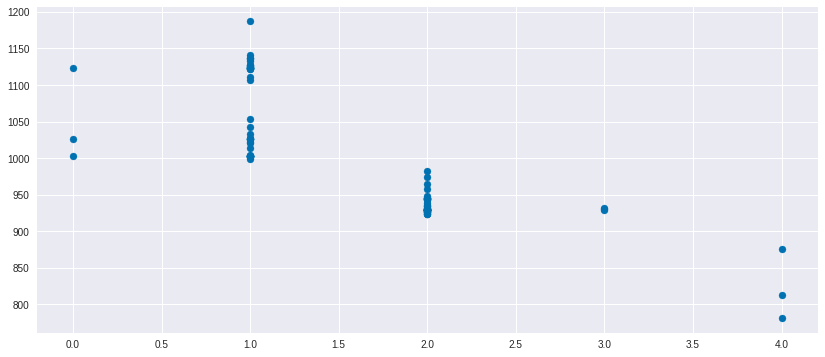

In [11]:
plt.figure(figsize=(14, 6))
plt.scatter(scores_df['i'], scores_df['score'])

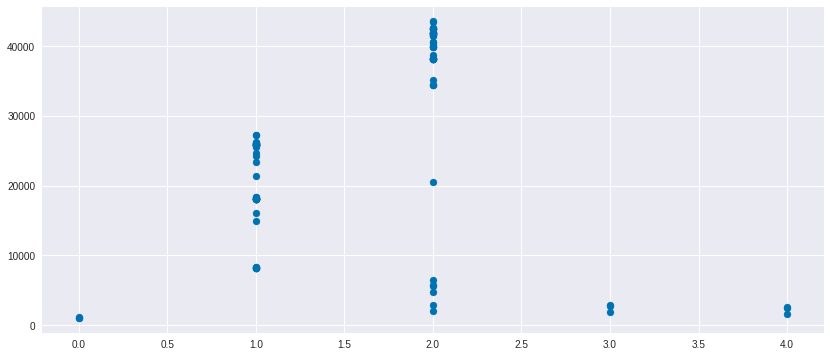

In [12]:
plt.figure(figsize=(14, 6))
plt.scatter(scores_df['i'], scores_df['neigh_score'])

In [13]:
songs = nd.iloc[2]['pop']

In [14]:
from bisect import bisect_left

100


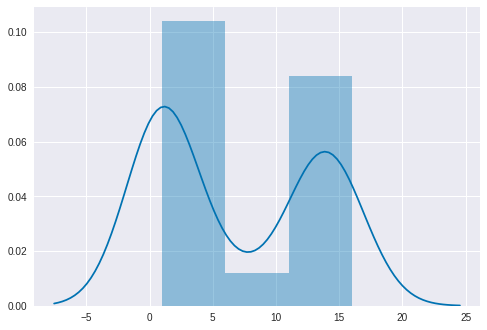

38.8544
500


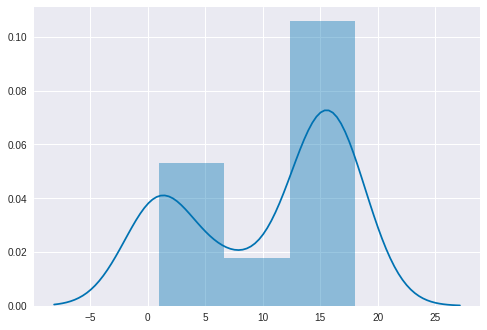

44.3376
5000


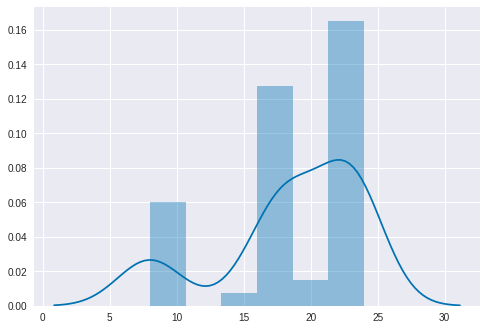

27.1636
10000


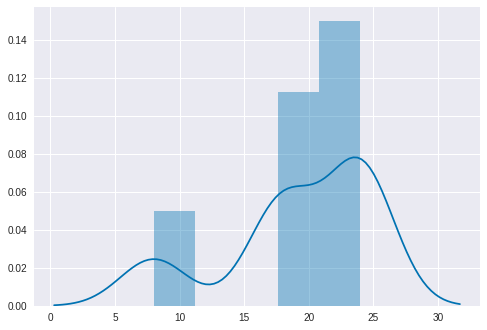

31.6416
50000


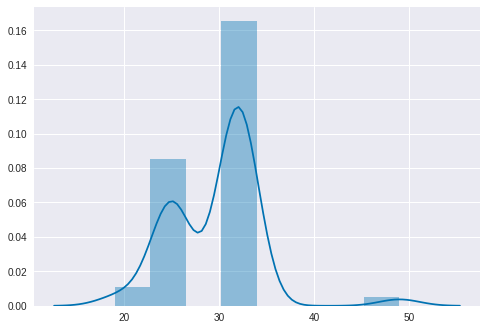

21.5956
100000


LinAlgError: singular matrix

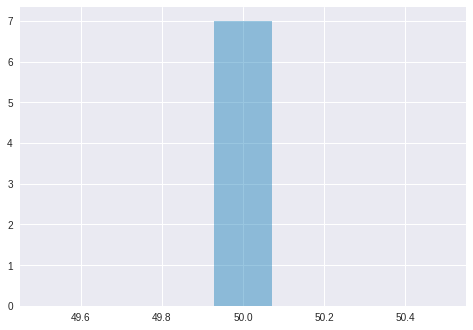

In [26]:
m = 1
for th in [100, 500, 5000, 10000, 50000, 100000]:
    print(th)
    neigh = genetic_neighbours(nd.iloc[m]['pop'], nd.iloc[m]['pop'], threshold=th)
    sns.distplot(neigh)
    plt.show()
    print(np.var(neigh))

In [16]:
nd.iloc[m]['pop'][66].gestures

IndexError: index 66 is out of bounds for axis 0 with size 50